# Problem set 4




## 1.

In [2]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt
import random as rand

players = {'1':4,
'2':4,
'3':4,
'4':4,
'5':4,
'6':5,
'7':5,
'8':5}

games = [('1','8'),('6','7')]



def ps4_q1(players,target_player,games = []):

    #create a new directedgraph
    di_graph = nx.DiGraph()

    games_wot = [game for game in games if target_player not in game] # adds time |games|


    player_nodes = {}
    for game in games_wot:
        p1,p2 = game

        player_nodes[p1] = players[p1]
        player_nodes[p2] = players[p2]








    target_player_games =players[target_player] + len(games) - len(games_wot)


    #add a source node
    di_graph.add_node('s',pos=(0,int(len(games_wot)/2)))

    #add a target node
    di_graph.add_node('t',pos=(6,int(len(games_wot)/2)))


    #set up player nodes
    for ind, player in enumerate(player_nodes):
        #add the player node
        di_graph.add_node(player,pos=(4,ind))

        # add an edge from the player node
        # to the target node with a capacity of games we
        # are assuming the target player won plus
        # the games we know the target player won
        # minus the total win of the player in the player node
        # this is so that the player can not win more games
        # than the target player
        di_graph.add_edge(player,'t',capacity = target_player_games - players[player])



    #setting up game nodes
    for ind,game in enumerate(games_wot):

        p1,p2 = game

        #add the game node
        di_graph.add_node(game,pos=(2,ind))

        #add an edge from the source node
        # to the game node with a capacity of 1
        di_graph.add_edge('s',game,capacity = 1)

        #add edge of capacity 1 to player nodes
        di_graph.add_edge(game,p1,capacity = 1)
        di_graph.add_edge(game,p2,capacity = 1)

    #run max flow
    max_flow = nx.algorithms.maximum_flow(di_graph,'s','t')

    if max_flow[0] == len(games_wot):
        return True
    else:
        return False


print(ps4_q1(players,'8',games))


True


## 2.

In [ ]:
maxR = 20

nA = 5
A = {}

nC = 20
C = [i for i in range(nC)]

for i in range(nA):
    A[f'{i}'] = {'budget': 20,'target_customers': rand.choice(C,k=rand.randint(0,nC-1))}



## 4.

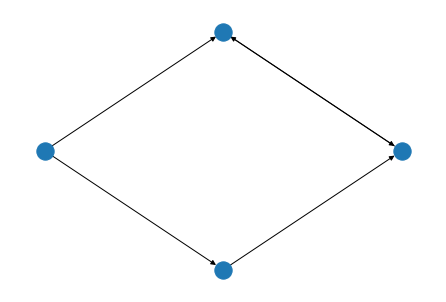

In [15]:


g = Network(notebook=True,directed=True)
G=nx.MultiDiGraph()

G.add_node(1,pos=(1,1))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(2,0))
G.add_node(4,pos=(3,1))

G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,4)
G.add_edge(3,4)
G.add_edge(4,2)


pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos,connectionstyle='arc3')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

# g.from_nx(G)
# g.show("j.html")


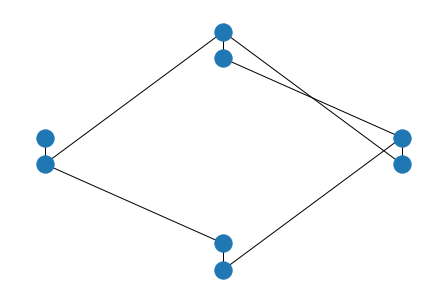

In [8]:
def direct_to_undirect(di_graph):

    #create a new undirectedgraph
    undi_graph = nx.Graph()

    nodes = di_graph.nodes(data=True)


    #make in out nodes
    for node in nodes:

        node_name = node[0]
        node_pos = node[1]['pos']

        undi_graph.add_node(f'{node_name}_in',pos=((node_pos[0]*4) ,(node_pos[1]*4)+1))
        undi_graph.add_node(f'{node_name}_out',pos=((node_pos[0]*4)  ,(node_pos[1]*4)))
        undi_graph.add_edge(f"{node_name}_out",f"{node_name}_in")

    edges = di_graph.edges()

    for edge in edges:
        undi_graph.add_edge(f"{edge[0]}_out",f"{edge[1]}_in")

    return undi_graph


u_g = direct_to_undirect(G)
pos=nx.get_node_attributes(u_g,'pos')
nx.draw(u_g,pos)
plt.show()

In [ ]:
# g = Network(notebook=True,directed=True)
# G=nx.DiGraph()
# i=1
# G.add_node(i,pos=(i,i))
# G.add_node(2,pos=(2,2))
# G.add_node(3,pos=(1,0))
# G.add_edge(1,2,weight="1/2")
# G.add_edge(1,3,weight=9.8)
# pos=nx.get_node_attributes(G,'pos')
# nx.draw(G,pos)
# labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
# plt.show()

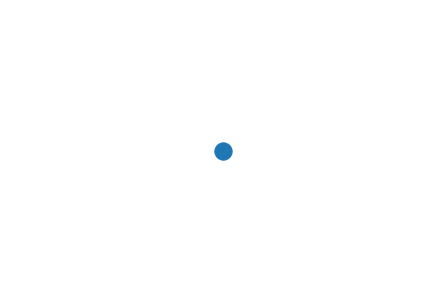

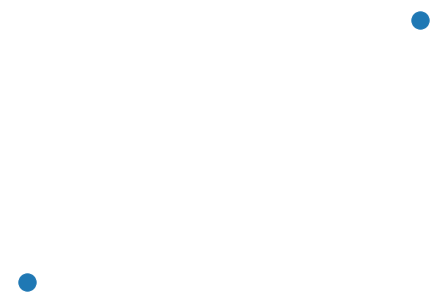

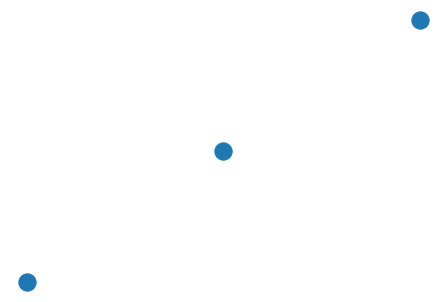

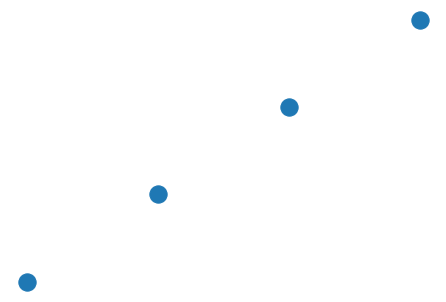

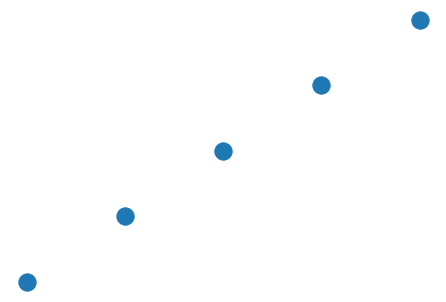

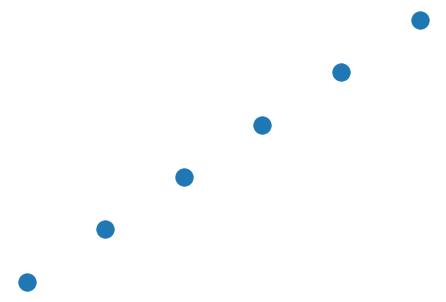

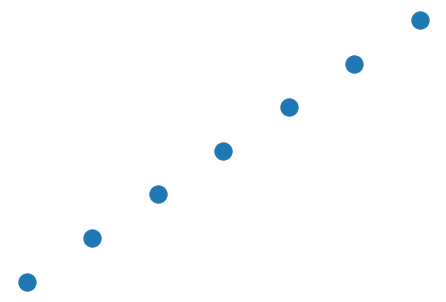

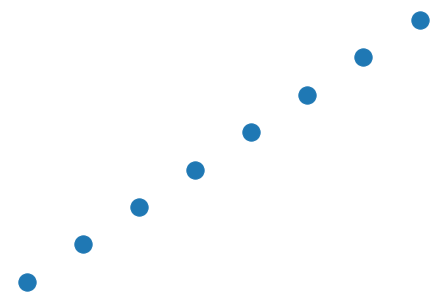

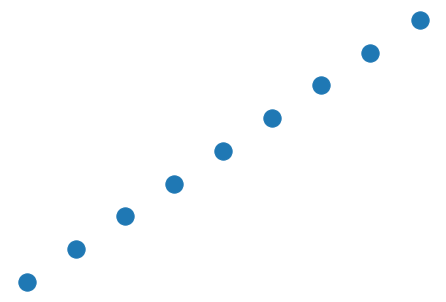

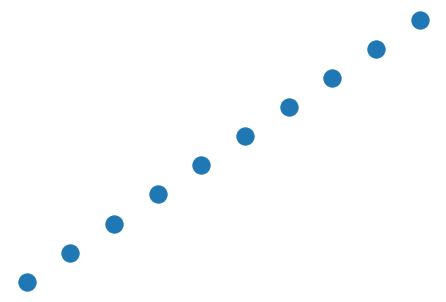

In [9]:
undi_graph = nx.Graph()
for i in range(10):